<a href="https://colab.research.google.com/github/shubham123121/real_estate_price_estimaion/blob/main/Real_estate_price_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df1= pd.read_csv("Bengaluru_House_Data (1).csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.shape

(13320, 9)

In [ ]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
df2=df1.drop(['availability','society','balcony','area_type'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df2['bath'].fillna(df2['bath'].median(),inplace=True)

In [ ]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [ ]:
df3=df2.dropna()

In [ ]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [ ]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-11-c379116b8702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [ ]:
df3=df3.drop(['size'],axis =1)

In [ ]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df3[df3.bhk>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [ ]:

df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def convert_sqft_to_num(x):
  token = x.split('-')
  if (len(token)==2):
    return (float(token[0])+float(token[1]))/2
  try:
    return float(x)
  except:
    return None


In [ ]:
df4 = df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [ ]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [ ]:
df4['price_per_sqft']= df4['price']*100000/df4['total_sqft']
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df4['location'] = df4['location'].apply( lambda x:x.strip())
len(df4[df4.location == "Electronic City Phase II"])

132

In [ ]:
df4.group

AttributeError: ignored

In [ ]:
def location_convert(df,x):
  if(len(df[df.location == x])<=10):
    return "others"
  else:
    return x

In [ ]:
df4['new_location'] = df4['location'].apply(lambda x: location_convert(df4,x))

In [ ]:
len(df4[df4.new_location == "others"])


2882

In [ ]:
len(df4.new_location.unique())

242

In [ ]:
df4.head()


,location,total_sqft,bath,price,bhk,price_per_sqft,new_location
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,Electronic City Phase II
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615,Chikka Tirupathi
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,Uttarahalli
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,Lingadheeranahalli
4,Kothanur,1200.0,2.0,51.00,2,4250.000000,Kothanur


In [ ]:
df5 = df4[~((df4.total_sqft/df4.bhk)<300)]

In [ ]:
df5.shape

(12559, 7)

In [ ]:
def location_convert(df):
  df_out=pd.DataFrame()
  for key, dft in df.groupby('new_location'):
    mean = dft['price_per_sqft'].mean()
    std = dft['price_per_sqft'].std()
    dftr = dft[(dft.price_per_sqft<(mean+std)) & (dft.price_per_sqft>(mean-std))]
    df_out = pd.concat([df_out,dftr],ignore_index = True)
  return df_out


In [ ]:
df6= location_convert(df5)

In [ ]:
df6.shape

(10337, 7)

In [ ]:
def plot_scatter(df,location):
  bhk2 = df[(df.new_location == location) & (df.bhk == 2)]
  bhk3 = df[(df.new_location == location) & (df.bhk == 3)]
  plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue',label = '2 BHK' )
  plt.scatter(bhk3.total_sqft,bhk3.price,color = 'red',label = '3 BHK' )
  plt.xlabel("Total squre foot area")
  plt.ylabel("Price")
  plt.legend()

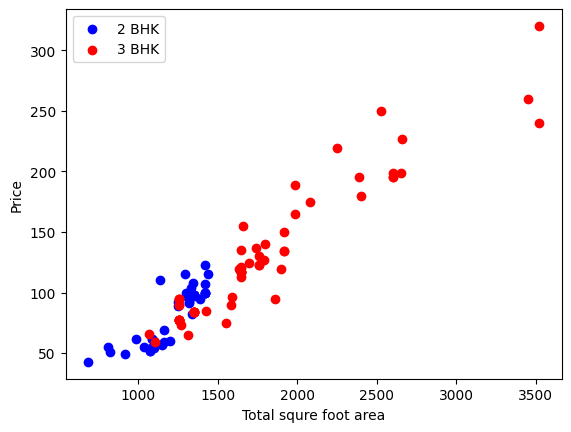

In [ ]:
plot_scatter(df6,"Hebbal")

In [ ]:
df7=df6.groupby('new_location')
"Electronic City Phase II"_df7

SyntaxError: ignored

In [ ]:
Dict = {1: 'Geeks', 2: 'For', 4: 'Geeks',  3: {'A': 'Welcome', 'B': 'To', 'C': 'Geeks'}}



In [ ]:
for a,b in Dict.items():
  print(a)
  print(b)


1
Geeks
2
For
4
Geeks
3
{'A': 'Welcome', 'B': 'To', 'C': 'Geeks'}


In [ ]:
def outlier(df):
  df8= df.groupby('new_location')
  df9 =pd.DataFrame()
  for location, location_df in df8:
    lis={}
    for bhk, bhk_df in location_df.groupby('bhk'):
      lis[bhk]={
          'mean' : bhk_df['price_per_sqft'].mean(),
          'std' : bhk_df['price_per_sqft'].std(),
          'count' : bhk_df.shape[0]
          }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = lis.get(bhk-1)
      if stats and stats['count']>5:
        df10 = bhk_df[bhk_df.price_per_sqft>stats['mean']]
        df9 = pd.concat([df9,df10],ignore_index = True)
      else:
        df9 = pd.concat([df9,bhk_df], ignore_index = True)


  return df9


In [ ]:
df7=outlier(df6)

In [ ]:
df7.shape

(7409, 7)

In [ ]:
df7[df7.bhk == 3]

,location,total_sqft,bath,price,bhk,price_per_sqft,new_location
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,1st Block Jayanagar
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,1st Block Jayanagar
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,1st Block Jayanagar
16,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667,1st Phase JP Nagar
17,1st Phase JP Nagar,2065.0,4.0,210.0,3,10169.491525,1st Phase JP Nagar
...,...,...,...,...,...,...,...
7206,Agrahara Dasarahalli,1350.0,1.0,120.0,3,8888.888889,others
7207,KEB Colony,1500.0,3.0,90.0,3,6000.000000,others
7208,Chikku Lakshmaiah Layout,2292.0,2.0,285.0,3,12434.554974,others
7209,Hennur Gardens,1945.0,3.0,135.0,3,6940.874036,others


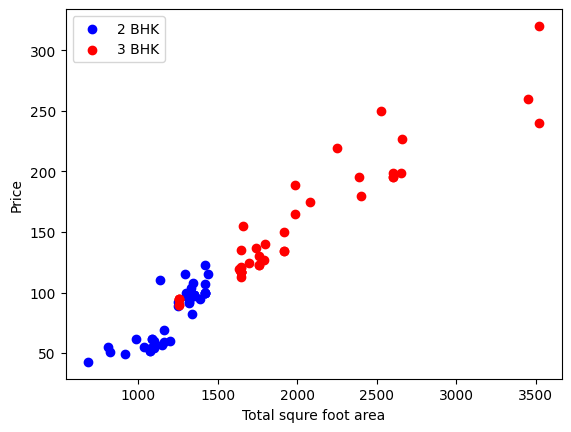

In [ ]:
plot_scatter(df7,"Hebbal")

(array([ 555., 3622., 2323.,  462.,  257.,  124.,   40.,   16.,    5.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

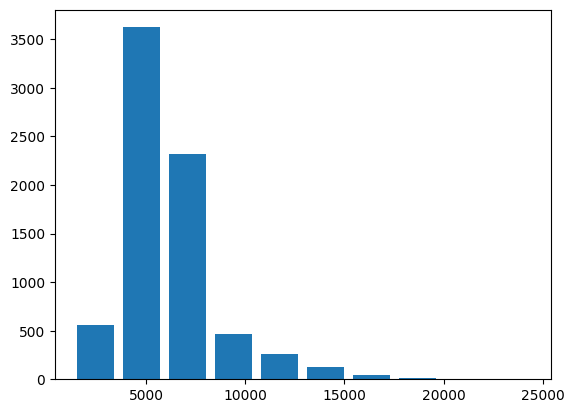

In [ ]:
plt.hist(df7.price_per_sqft, rwidth = 0.8)

In [ ]:
df8=df7[~(df7.bath>df7.bhk+2)]
df8.shape

(7405, 7)

In [ ]:
df8.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,new_location
0,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,1st Block Jayanagar
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,1st Block Jayanagar
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,1st Block Jayanagar
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,1st Block Jayanagar
4,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,1st Block Jayanagar


In [ ]:
df9=df8.drop(['location','price_per_sqft'], axis =1)

In [ ]:
df9.head()

,total_sqft,bath,price,bhk,new_location
0,1235.0,2.0,148.0,2,1st Block Jayanagar
1,1630.0,3.0,194.0,3,1st Block Jayanagar
2,1875.0,2.0,235.0,3,1st Block Jayanagar
3,1200.0,2.0,130.0,3,1st Block Jayanagar
4,2850.0,4.0,428.0,4,1st Block Jayanagar


In [ ]:
dummies = pd.get_dummies(df9.new_location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df10  = pd.concat([df9.drop(['new_location'],axis =1),dummies.drop(['others'], axis =1)], axis = 'columns')

In [ ]:
df10.shape

(7405, 245)

In [ ]:
x = df10.drop(['price'], axis = 'columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df10.price
y.head()

0    148.0
1    194.0
2    235.0
3    130.0
4    428.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7723040034760411

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), x,y, cv=cv)


array([0.85253443, 0.83957712, 0.8086088 , 0.8598399 , 0.85755532])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
def find_best(x,y):
  algosde = {
      'LinearRegression' : {
      'model' : LinearRegression(),
      'para' : {
          'fit_intercept' : [True, False]
      }
    },

      'SVR' : {
      'model' : SVR(),
      'para' : {
          'kernel' : ['rbf']
      }

    },
       'Randi' : {
      'model' : RandomForestRegressor(),
      'para' : {
          'n_estimators' : [5]
      }

    }
  }

  scores = []
  cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 0)

  for mod, mod_par in algosde.items():

   gs = RandomizedSearchCV(mod_par['model'],mod_par['para'], cv =cv, return_train_score = False)
   gs.fit(x,y)
   scores.append({
      'model' : mod,
      'score' : gs.best_score_,
      'best_para' : gs.best_params_
   })

  return scores

In [ ]:
find_best(x,y)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{'model': 'LinearRegression',
  'score': 0.8441927881436782,
  'best_para': {'fit_intercept': False}},
 {'model': 'SVR', 'score': 0.5851636499582407, 'best_para': {'kernel': 'rbf'}},
 {'model': 'Randi',
  'score': 0.7722491827761393,
  'best_para': {'n_estimators': 5}}]

In [ ]:
def pred(location,total_sqft,bath,bhk):
  x1= x.columns.get_loc(location)

  q=len(x.columns)
  z = [0]*q
  z[0] = total_sqft
  z[1] = bath
  z[2] = bhk
  z[x1]  = 1

  return lr.predict([z])


In [ ]:
res = pred("Indira Nagar",1000,2,3)
res

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([172.57825521])